### Import Data and Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path to main project 'InstacartBasket'

In [2]:
path = r"C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\Python\Instacart Basket Analysis"

In [3]:
# Importing orders_products_merged_aggregated file
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))

In [5]:
ords_prods_merge.shape

(32404859, 23)

<Axes: >

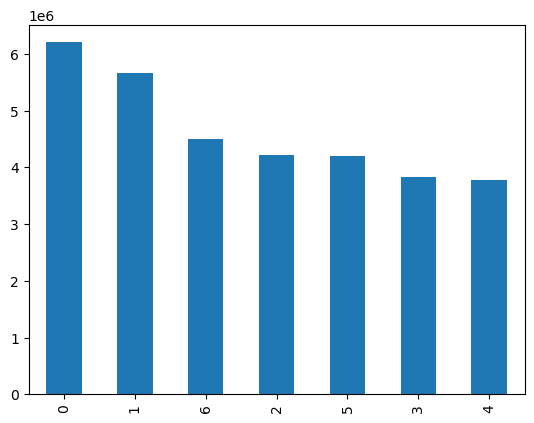

In [5]:
# Create a Bar Chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

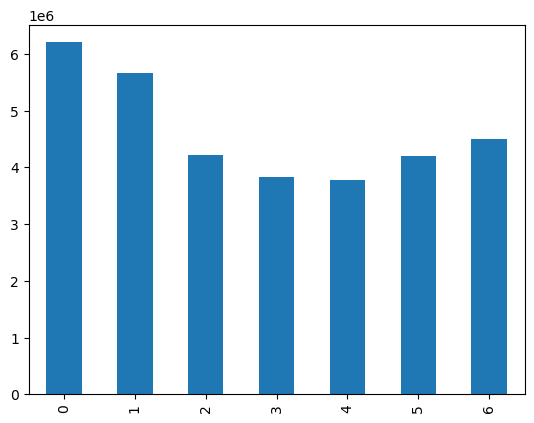

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

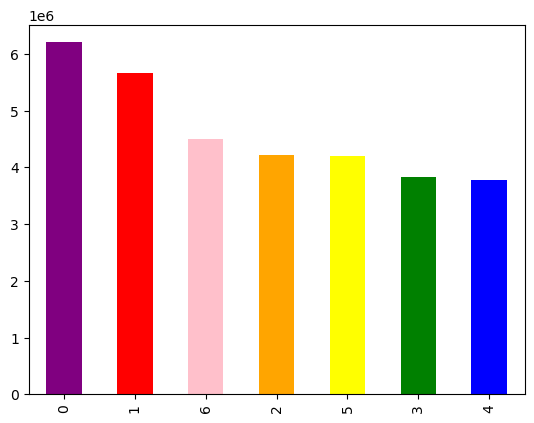

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


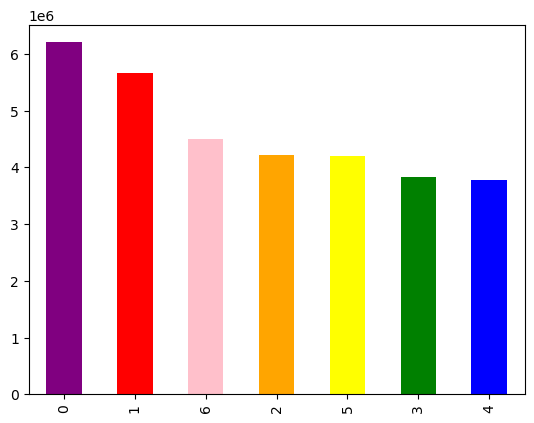

In [11]:
bar.figure

In [12]:
# Export the figure from the bar object using savefig function
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

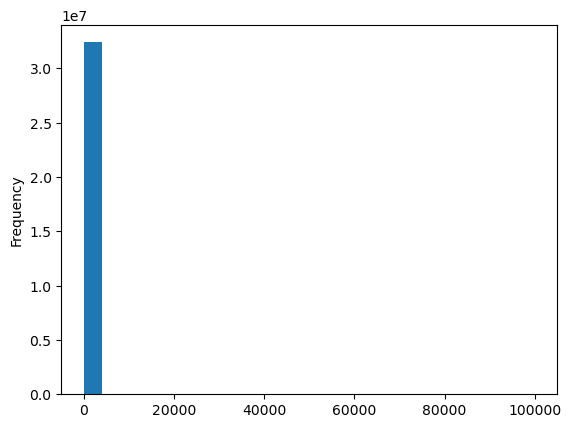

In [13]:
# creating histogram for prices
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
# max has odd value observed from describe function
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.048615e+01
std      4.956394e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

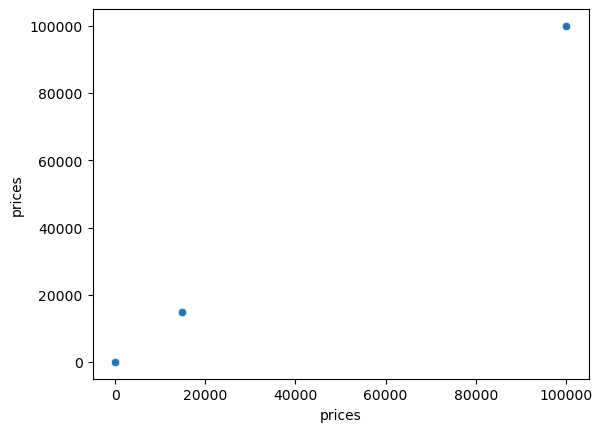

In [17]:
# To identify outliers we can use scatterplot with the same variable as x,y
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
#checking for products above normal price (>$100)in supermarket
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648300,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648300,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792358,High Spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Most Busiest day,Average Orders,4,New customer,1154.792358,High Spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Second Busiest day,Average Orders,16,Regular customer,114.426620,High Spender,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Most Busiest day,Average Orders,39,Regular customer,1106.743896,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Most Busiest day,Most Orders,39,Regular customer,1106.743896,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Second Least busy,Most Orders,15,Regular customer,451.153534,High Spender,4.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Second Least busy,Average Orders,12,Regular customer,1178.381836,High Spender,7.0,Frequent customer


In [20]:
# Marking data as missing whose price is over 100 $ and don't make any sense
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [21]:
ords_prods_merge['prices'].max()

25.0

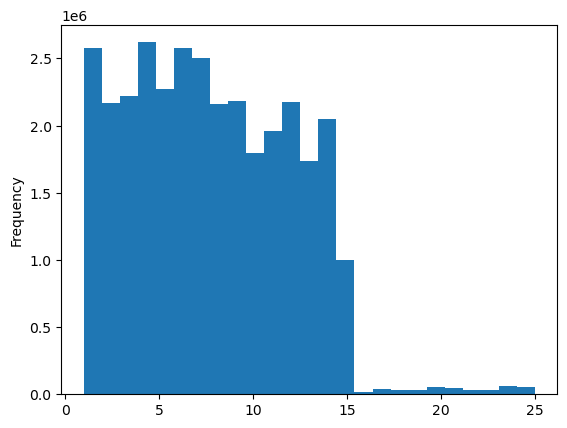

In [22]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

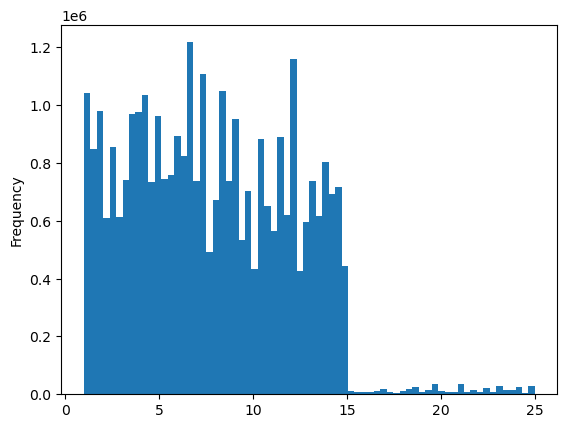

In [23]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [24]:
# Export the figure from the hist object using savefig function
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))


In [25]:
#set the seed for reproducible code generation
np.random.seed(4)

In [27]:
#70 % sample testing
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
#70 % sample list created
big = ords_prods_merge[dev]

In [29]:
#30 % sample list created
small = ords_prods_merge[~dev]

In [30]:
len(ords_prods_merge)

32404859

In [31]:
len(big)+len(small)

32404859

In [32]:
df_2 = small[['orders_day_of_week','prices']]

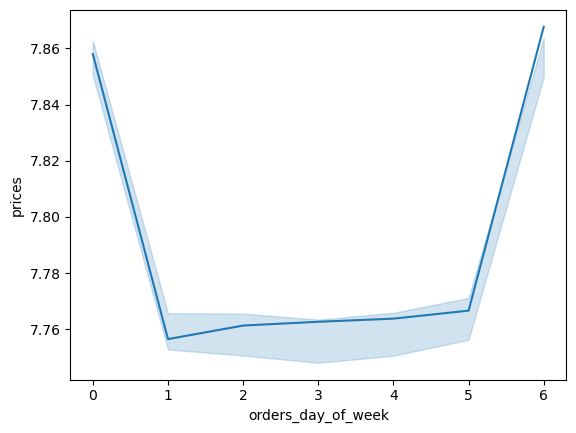

In [34]:
# Line chart for these two columns prices and orders day of week
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')